In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###

# Plot settings
%config InlineBackend.figure_format = 'svg'
sb.set()
from tqdm import tqdm

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

import stylised_facts_data_utilities.createLOB as createLOB

%matplotlib inline
import os
os.getcwd()

'/home/ak/Documents/Research/PaperCode/stylised_facts'

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as tsaplots
from collections import OrderedDict
import GPy as gpy
import pandas as pd
import os.path 
import os
import seaborn as sns
import statsmodels.regression.quantile_regression as QuantReg
import tensorflow as tf
import sklearn
import scipy.stats
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
from sklearn import preprocessing
%matplotlib inline

 /home/ak/anaconda3/envs/ds3_kernels/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning:Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
 /home/ak/anaconda3/envs/ds3_kernels/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning:Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
 /home/ak/anaconda3/envs/ds3_kernels/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning:Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
 /home/ak/anaconda3/envs/ds3_kernels/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning:Passing (type, 1) or '1type' as a synonym of type is deprecated; in a f

In [3]:
folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
folderList = os.listdir(folder)
folderList
symbosl =['FB1','JB1','FV1','G_1']

In [4]:
os.getcwd()
''' Locations'''
cwd= os.getcwd()
extHD = '/media/ak/My Passport/'
extHdData = "".join((extHD, 'Data'))
extHdExpData = "".join((extHD, 'Experiment Data')) #['features', 'labels', 'metrics', 'models']
extHdFutures = "".join((extHD, 'Barket Data/raw bloomberg data')) #futures
bmrg_folders=[s for s in os.listdir(extHdFutures) if ('Comdty') in s]

In [5]:
def qpk(params, z):
    return params[0] + params[1] * (1./params[2] * ( np.exp(params[2] * z ) - 1. ) * np.exp( params[3]*z**2. / 2.))

In [6]:
def estimateTukeyDistribution(Y):
    """
    Tukey Estimation based on Genton's paper 2.1 sect
    """
    p = np.linspace(1e-2, 1-1e-2, 50)
    
    zpk =scipy.stats.norm.ppf( p )
    qhat = np.percentile( Y, p*100 )
    
    def qresiduals( params, zpk, qhat):
        return np.sum((qhat - qpk( params, zpk ))**2)
    
    mu = np.mean(Y)
    std = np.std(Y-mu)
    
    res= scipy.optimize.least_squares( qresiduals, x0=(mu, std, 0.6, 0.2), bounds=( np.array([-np.inf, 1e-2, -np.inf, 1e-2]),\
                                              np.array([np.inf, np.inf, np.inf, np.inf])), args= (zpk, qhat) )
    return res

In [7]:
test=createLOB.rawLOBFIle(futuresFolder=extHdFutures, symbolsFolder=bmrg_folders, symbolID=1,fileID=15)

In [8]:
LOB =createLOB.calcLOB(createLOB.formatLOB(createLOB.createLOB(test)))

 /home/ak/Envs/resrPyth3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 /home/ak/Envs/resrPyth3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 /home/ak/Documents/Research/PaperCode/stylised_facts/stylised_facts_data_utilities/createLOB/__init__.py:333: RuntimeWarning:divide by zero encountered in log


In [9]:
LOB.tail(40).columns.values

array(['BidQuoteId', 'BidSize', 'QuoteTime', 'type_x', 'BestBid',
       'TradeTime', 'AskQuoteId', 'AskSize', 'time_y', 'type_y',
       'BestAsk', 'TradeId', 'TradeVolume', 'TradedTime', 'type',
       'TradePrice', 'TradeId', 'TimeStamp', 'milliSeconds',
       'DollarVolume', 'MicroPrice', 'TradeSize', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPricePctChange',
       'FwdMPChange_1', 'FwdMPChange_5', 'LogTradeSize'], dtype=object)

In [16]:
LOB.head(3)

,BidQuoteId,BidSize,QuoteTime,type_x,BestBid,TradeTime,AskQuoteId,AskSize,time_y,type_y,...,MicroPrice,TradeSize,Duration,PriceChange,LogReturn,BidOffer,MicroPricePctChange,FwdMPChange_1,FwdMPChange_5,LogTradeSize
0,0,1,2018-05-09 06:30:00.002,BID,158.93,2018-05-09 06:30:00.002,1,1,2018-05-09 06:30:00.002,ASK,...,159.080,0.0,0.0,NaN,NaN,0.30,NaN,NaN,NaN,-inf
1,6,1,2018-05-09 06:30:06.377,BID,159.00,2018-05-09 06:30:06.377,5,1,2018-05-09 06:30:01.592,ASK,...,159.095,0.0,6375.0,NaN,NaN,0.19,0.000094,NaN,NaN,-inf
2,8,1,2018-05-09 06:30:50.101,BID,159.10,2018-05-09 06:30:50.101,7,1,2018-05-09 06:30:34.211,ASK,...,159.140,0.0,43724.0,NaN,NaN,0.08,0.000283,0.000094,NaN,-inf


In [10]:
logreturn = np.asanyarray(LOB.LogReturn)
min_max_scaler = preprocessing.StandardScaler()



In [11]:
z_scaled = min_max_scaler.fit_transform(z)

NameError: name 'z' is not defined

In [12]:
estimateTukeyDistribution(Z)

NameError: name 'Z' is not defined

(array([   7.,   52.,  293.,  744., 1315., 1307.,  877.,  324.,   68.,
          13.]),
 array([-3.74171164, -3.00638652, -2.2710614 , -1.53573629, -0.80041117,
        -0.06508605,  0.67023907,  1.40556419,  2.14088931,  2.87621443,
         3.61153954]),
 <a list of 10 Patch objects>)

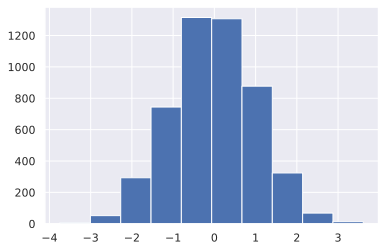

In [13]:
Z = np.random.normal(size=(5000,))
plt.hist(Z)

In [14]:
Yhat = qpk(res.x, Z)

NameError: name 'res' is not defined

In [15]:
params = dict( zip(['loc', 'scale', 'g','h'], res.x))

NameError: name 'res' is not defined

In [52]:
import seaborn as sns

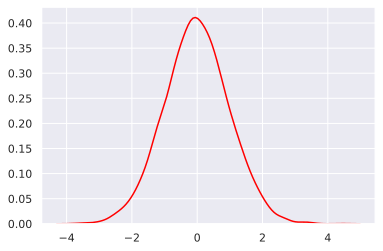

In [81]:
sns.distplot(Z, hist=False, color='red')


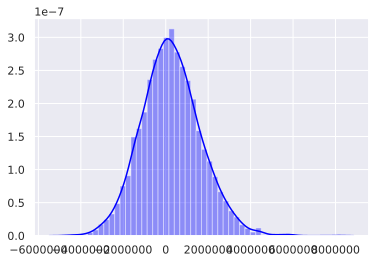

In [82]:
sns.distplot(Yhat, hist=True, color='blue')